In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler

import helpers

In [2]:
X,y = load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)

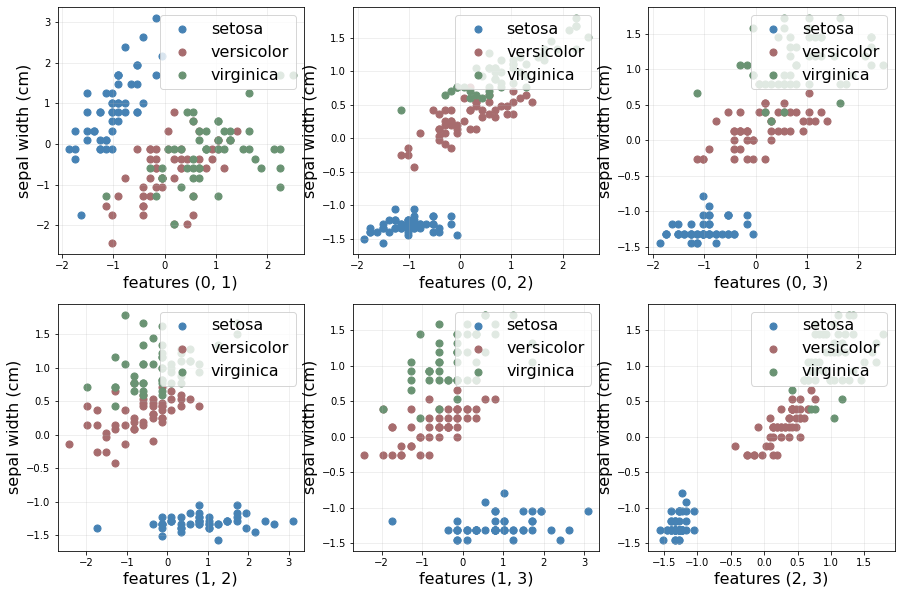

In [3]:
fig,  ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for idx, (i, j) in enumerate([(k,l) for k in range(4) for l in range(4) if k<l ]):
    helpers.plot_iris(X[:, [i,j]], y, ax[idx//3, idx % 3])
    ax[idx//3, idx % 3].set_xlabel(f"features {i,j}")

# Decision Trees

**Q1 [2 min]** - Complete the following cell to plot the decision surface of a DecisionTree classifier (default parameters) on features 2,3

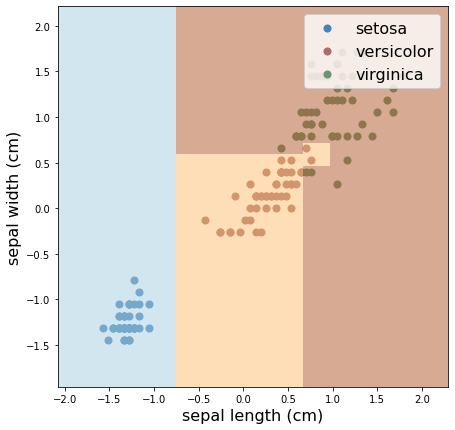

In [4]:
features = [2,3]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
#

#
plt.show()

Scikit-learn provides `plot_tree` to display the decision tree.
**Q2 [1min]** Display the decision tree

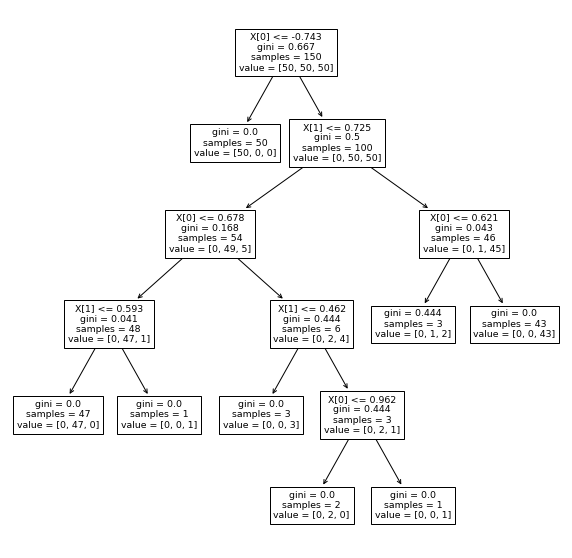

In [5]:
plt.rcParams["figure.figsize"] = (10,10)
#

#

## Gini Index

"... is a measure of statistical dispersion intended to represent the income inequality or the wealth inequality within a nation or a social group. The Gini coefficient was developed by the statistician and sociologist Corrado Gini. "

If we have a set of categorical values $ A = \{a_1, a_2... a_n\} $ in $\{1, 2, ... k\}$, let $p_n$ be th ratio of $(a_i)_i$ that is equal to $n$, then:
$$
Gini(A) = 1- \sum_n {p_n}^2
$$

**Q3[1.5min]** Show that $Gini(A) = \sum_n p_n (1-p_n)$ (has nothing to do with the implementation)

Answer:

**Q4[2min]** Complete `gini` function, given a 1-d array of values A, return the gini index value

In [6]:
def gini(A):
    gini_index = 0
    #

    #
    return gini_index

Let's try to do some economics to understand what gini index is: We work on binary values, since $p_0 = 1-p_1$, we get $Gini(A) = 2 p_0 (1-p_0)$


**Q5[1min]** plot $Gini(A)$ as a function of $p_0$

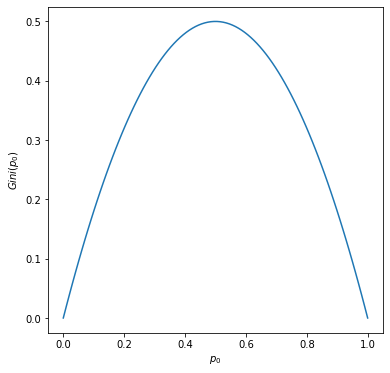

In [7]:
plt.figure(figsize=(6,6))
p_0 = np.linspace(0,1, 100)
#

#
plt.plot(p_0, gini_A)
plt.xlabel(r"$p_0$")
plt.ylabel(r"$Gini(p_0)$")
plt.show()

Now let's do thing manually and check if the tree plot is correct.

In [8]:
print(np.array([clf.tree_.children_left, clf.tree_.children_right]))
print(clf.tree_.threshold)
print(clf.tree_.feature)

[[ 1 -1  3  4  5 -1 -1  8 -1 10 -1 -1 13 -1 -1]
 [ 2 -1 12  7  6 -1 -1  9 -1 11 -1 -1 14 -1 -1]]
[-0.74343352 -2.          0.72485456  0.67750213  0.59322238 -2.
 -2.          0.46159019 -2.          0.96168923 -2.         -2.
  0.62066472 -2.         -2.        ]
[ 0 -2  1  0  1 -2 -2  1 -2  0 -2 -2  0 -2 -2]


**Q6[4min]** Split the data based on the threshold and compute gini index for each of the two splits

In [9]:
X_c = X[:, features]
#

#
print(gini(y[left]), gini(y[right]))

0.0 0.5


**Q7** What is the distribution of class labels across the two splits?

How decision tree works:
At each node, the goal is to split the data so that the weighted gini index decreases:
$$
Gini(split) \propto \text{#left} * Gini(left) + \text{#right} * Gini(right)
$$

**Q8** What are the possible thresholds for feature 0?


In [10]:
thresholds = np.unique(X_c[:, 0])

**Q9** Implement the weighted gini index

In [11]:
def weighted_gini(y, left, right):
    return 0

For each threshold, compute the weighted gini decrease

In [12]:
t_to_gini = {}
for t in thresholds:
    

In [13]:
sorted(t_to_gini.items(), key= lambda x: x[1]) [ :10]

[(-1.056039392054748, 75.0),
 (-1.169714245881954, 77.85467128027683),
 (-0.4308276960051133, 80.75936040704836),
 (-1.2265516727955572, 82.76966892132432),
 (-1.2833890997091604, 89.27872190461274),
 (-0.26031541526430396, 90.94819609668315),
 (0.7627582691805523, 91.40903686087992),
 (0.8195956960941558, 92.64579143924159),
 (0.7059208422669494, 92.903859074494),
 (0.8764331230077588, 93.75)]

 # Model Evaluation
 
 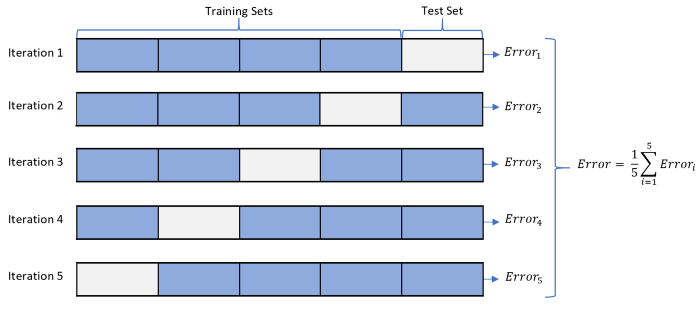

In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [29]:
X = np.arange(5)
kfold = KFold(n_splits=5)

In [30]:
for tr_index, ts_index in kfold.split(X):
    print(tr_index, ts_index)

[1 2 3 4] [0]
[0 2 3 4] [1]
[0 1 3 4] [2]
[0 1 2 4] [3]
[0 1 2 3] [4]


First, given a tree depth $k$, run KFold cross validation and return the average accuracy

In [31]:
def cross_validate(k):
    acc = 0.0
    #
    #
    return acc

In [32]:
h_parameters = [2,3,4,5]
for k in h_parameters:
    print(k, cross_validate(k))

2 0.0
3 0.0
4 0.0
5 0.0
